# Data Analysis and Exploration

Mouting Google Drive in Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import polars as pl
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets
import folium
import ee
import geemap
import numpy as np

Data directory and csv files

In [3]:
data_dir = '/content/drive/MyDrive/LIAM/Fire_Project/AI_project/data/raw/csv_NASA/modis/instrument_modis_2000-2024'
files = glob.glob(data_dir + '/*.csv')

Authentication to GEE focusing on MADAGASCAR

In [ ]:
ee.Authenticate()
ee.Initialize(project='ee-kaloina4')  # 'ee-kaloina4' is the project name in GEE
pays = ee.FeatureCollection("FAO/GAUL/2015/level0");
madagascar = pays.filter(ee.Filter.eq('ADM0_NAME', 'Madagascar'));

# Space Analysis
Where and when is the highest FRP and Brightness value observed each year?

## FRP
FRP : Fire Radiative Power, measure of the energy emitted by a fire, expressed in MegaWatts(MW)

In [ ]:
frp_result_df = pl.DataFrame()
for file in files:
    df = pl.read_csv(file, separator=';')
    max_frp_row = df.filter(pl.col('frp') == pl.col('frp').max())
    max_frp_row = max_frp_row.with_columns(pl.lit(file[-19:][:4]).alias("Year").cast(pl.Int64))
    frp_result_df = pl.concat([frp_result_df, max_frp_row])
frp_result_df=frp_result_df.select(["Year","latitude","longitude","brightness","acq_date","acq_time","frp"])
frp_result_df=frp_result_df.sort("Year")
pl.Config.set_tbl_rows(25)
frp_result_df

Year,latitude,longitude,brightness,acq_date,acq_time,frp
i64,f64,f64,f64,str,i64,f64
2000,-22.4038,43.4728,388.2,"""14/11/2000""",800,495.5
2001,-21.2541,46.8833,409.1,"""28/09/2001""",2015,1548.3
2002,-23.1536,44.0686,419.4,"""09/08/2002""",1024,1214.8
2003,-23.9023,47.4204,412.6,"""26/10/2003""",1003,1461.5
2004,-18.5298,48.2132,499.8,"""11/12/2004""",1030,1586.1
2005,-19.6256,44.647,497.0,"""31/08/2005""",1035,1843.9
2006,-17.7924,47.8965,452.3,"""26/10/2006""",1057,1899.3
2007,-15.2224,46.9336,427.6,"""27/09/2007""",1057,1081.4
2008,-19.2359,44.4757,415.6,"""21/09/2008""",1010,2618.4


On a map

In [ ]:
Mapf=geemap.Map()
Mapf.add_basemap('SATELLITE')
Mapf.addLayer(madagascar, {'color': 'black'}, "Madagascar")
Mapf.centerObject(madagascar,5)

for row in frp_result_df.iter_rows():
  popup_html = ipywidgets.HTML(f"Year: {row[0]}")
  Mapf.add_marker(location=[row[1], row[2]],
                 popup=popup_html)

In [ ]:
Mapf

Map(center=[-19.335922158747394, 46.7382233762819], controls=(WidgetControl(options=['position', 'transparent_â¦

## Brightness
Brightness temperature of a fire pixel, measured in Kelvin(K)

In [ ]:
brightness_result_df = pl.DataFrame()
for file in files:
    df = pl.read_csv(file, separator=';')
    max_brightness_row = df.filter(pl.col('brightness') == pl.col('brightness').max())
    max_brightness_row = max_brightness_row.with_columns(pl.lit(file[-19:][:4]).alias("Year").cast(pl.Int64))
    brightness_result_df = pl.concat([brightness_result_df, max_brightness_row])
brightness_result_df=brightness_result_df.select(["Year","latitude","longitude","brightness","acq_date","acq_time","frp"])
brightness_result_df=brightness_result_df.sort("Year")
pl.Config.set_tbl_rows(25)
brightness_result_df

Year,latitude,longitude,brightness,acq_date,acq_time,frp
i64,f64,f64,f64,str,i64,f64
2000,-15.3634,46.7413,392.0,"""04/11/2000""",722,205.8
2001,-17.2682,45.7978,415.6,"""14/06/2001""",730,375.8
2002,-24.7743,44.2138,455.7,"""24/10/2002""",1047,793.0
2003,-22.3805,47.0132,476.3,"""11/10/2003""",1047,1331.2
2004,-18.5298,48.2132,499.8,"""11/12/2004""",1030,1586.1
2005,-19.6256,44.647,497.0,"""31/08/2005""",1035,1843.9
2006,-16.1782,47.0001,498.1,"""28/09/2006""",1033,1581.4
2007,-22.195,46.8522,469.2,"""13/09/2007""",1043,1007.8
2008,-19.233,44.4751,488.9,"""20/09/2008""",1105,2077.1


On a map

In [ ]:
Mapb=geemap.Map()
Mapb.add_basemap('SATELLITE')
Mapb.addLayer(madagascar, {'color': 'black'}, "Madagascar")
Mapb.centerObject(madagascar,5)

for row in brightness_result_df.iter_rows():
  popup_html = ipywidgets.HTML(f"Year: {row[0]}")
  Mapb.add_marker(location=[row[1], row[2]],
                 popup=popup_html)

In [ ]:
Mapb

Map(center=[-19.335922158747394, 46.7382233762819], controls=(WidgetControl(options=['position', 'transparent_â¦

# Time Analysis


## Mean number of daily fire pixels per year

In [ ]:
daily_fire_df = pl.DataFrame()
for file in files:
    df = pl.read_csv(file, separator=';')
    df = df.group_by('acq_date').agg(pl.len())
    df = df.with_columns(pl.lit(file[-19:][:4]).alias("Year").cast(pl.Int64))
    daily_fire_df = pl.concat([daily_fire_df, df])

daily_fire_df = daily_fire_df.group_by('Year').agg(pl.col('len').mean())
pl.Config.set_tbl_rows(25)
daily_fire_df.sort('Year')

Year,len
i64,f64
2000,24.04
2001,84.266423
2002,132.89701
2003,196.823708
2004,132.067055
2005,211.632312
2006,166.763848
2007,201.307463
2008,159.017341


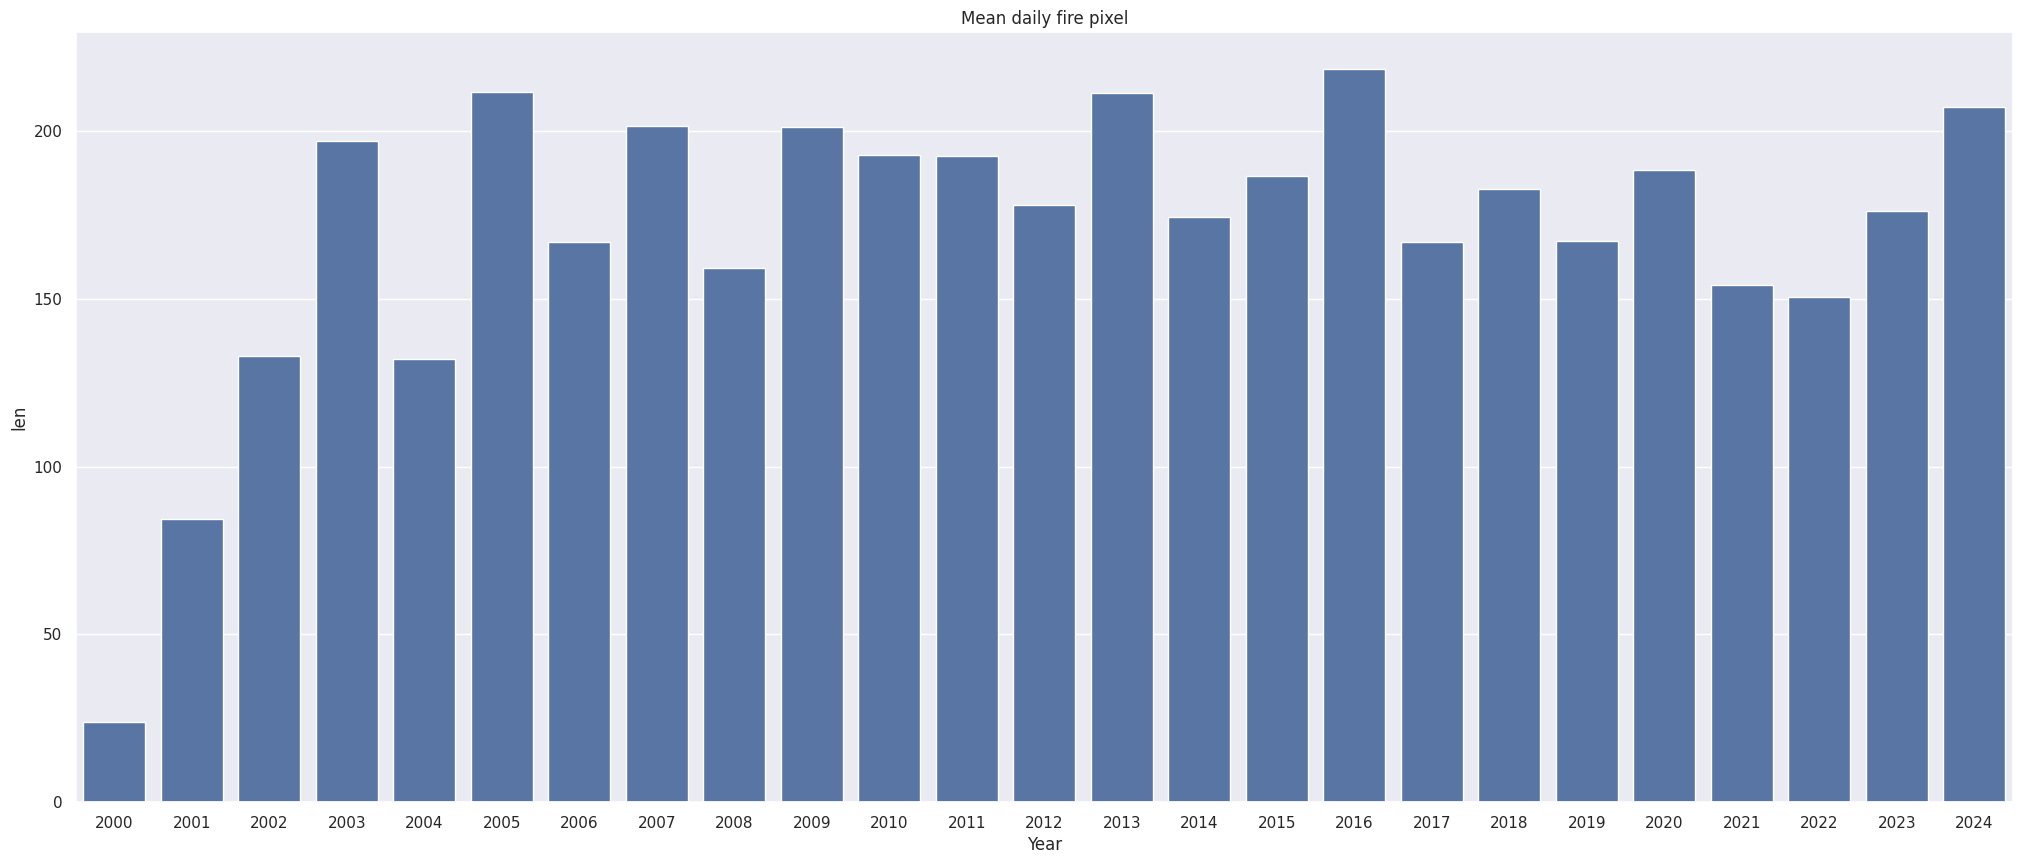

In [ ]:
sns.set()
plt.figure(figsize=(25,10))
sns.barplot(x='Year', y='len', data=daily_fire_df)
plt.title('Mean daily fire pixel')
plt.show()

## Analysis of mean FRP and brightness by month and year

In [57]:
def df_by_month_and_year(str):
  df_final = None
  for file in files:
      df = pl.read_csv(file, separator=';')
      yearstr=file.split('/')[12]
      yearstr=yearstr.split('_')[1]
      year = int(yearstr)
      if(year==2000):
        continue

      df = df.with_columns(pl.col('acq_date').str.slice(3, 2).cast(pl.Int64).alias('month'))

      df = df.group_by('month').agg(pl.col(str).mean())

      df = df.rename({str: f'{year}'})

      if df_final is None:
          df_final = df
      else:
          df_final = df_final.join(df, on='month')

  df_final = df_final.sort('month')
  pl.Config.set_tbl_rows(25)
  df_final = df_final[[col for col in sorted(df_final.columns)]]
  df_final = df_final.select(['month'] + [col for col in df_final.columns if col != 'month'])
  return df_final

In [60]:
def heatmap(df_final,str):
  df_long = df_final.melt(id_vars="month", variable_name="year", value_name="value")
  df_long = df_long.with_columns(pl.col("year").cast(pl.Int32))
  heatmap_data = df_long.pivot(
    index="month",
    columns="year",
    values="value"
  ).sort("month")
  plt.figure(figsize=(12, 8))

  sns.heatmap(
      data=df_long.to_pandas().pivot(index="year", columns="month", values="value"),
      annot=True,
      fmt=".1f",
      cmap="YlOrRd",
      linewidths=0.5,
  )

  plt.title("Heatmap: Mean "+ str)
  plt.xlabel("Month")
  plt.ylabel("Year")
  plt.show()

### FRP

<ipython-input-60-3303607254>:2: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  df_long = df_final.melt(id_vars="month", variable_name="year", value_name="value")
<ipython-input-60-3303607254>:4: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  heatmap_data = df_long.pivot(


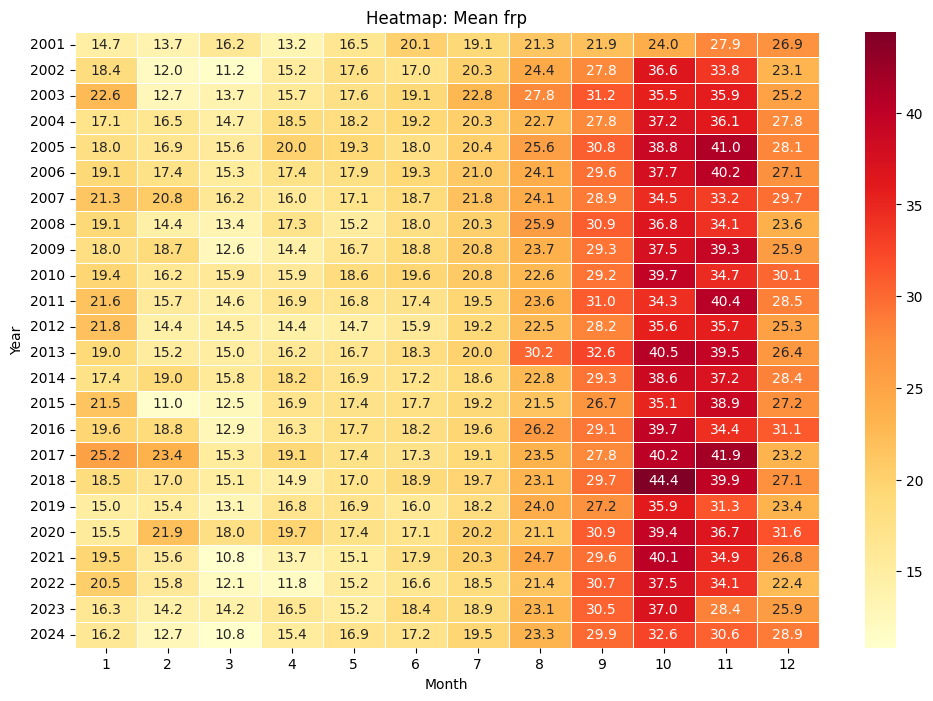

In [64]:
column='frp'
heatmap(df_by_month_and_year(column),column)

### Brightness

<ipython-input-60-3303607254>:2: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  df_long = df_final.melt(id_vars="month", variable_name="year", value_name="value")
<ipython-input-60-3303607254>:4: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  heatmap_data = df_long.pivot(


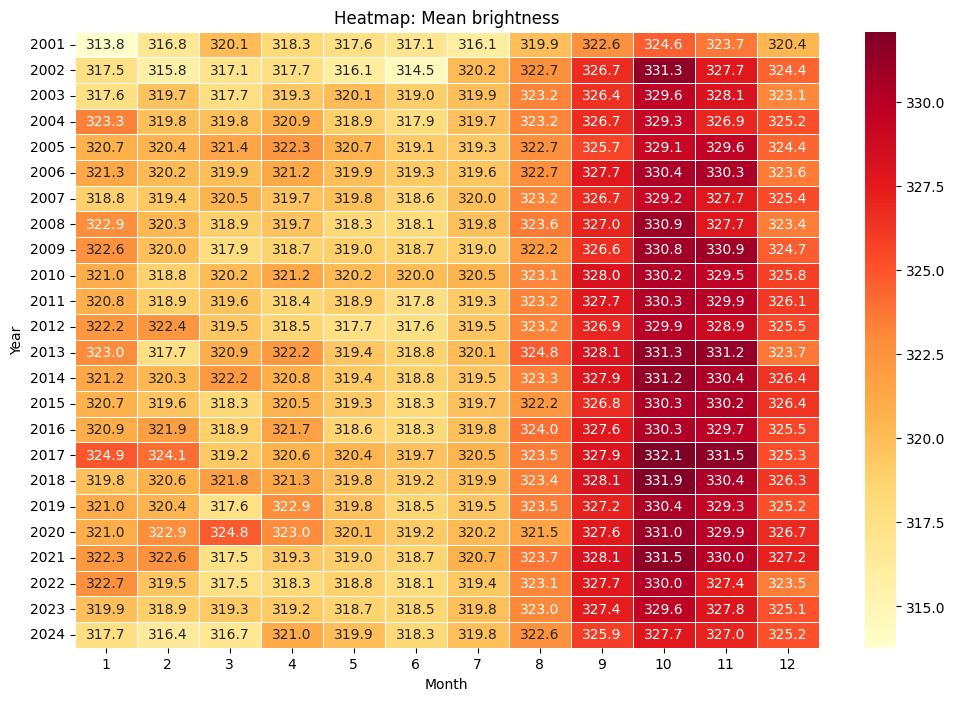

In [65]:
column='brightness'
heatmap(df_by_month_and_year(column),column)